<a href="https://colab.research.google.com/github/rameshavinash94/Deep_learning_Scratch/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYTORCH WITHOUT AUTODIFF**

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
from mpl_toolkits.mplot3d import Axes3D
import warnings
from typing import Callable
warnings.filterwarnings('ignore')

In [14]:
def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

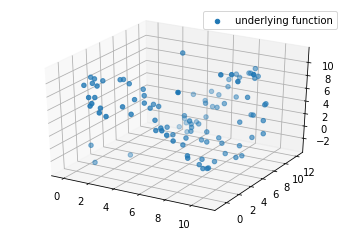

In [15]:
bias_true = torch.FloatTensor([1,-1])
x = rand_tensor = torch.rand((100, 3))
weights_1 = torch.FloatTensor([[1, 1,0],[1,0,1]]).T
weights_2 = torch.FloatTensor([[0,0,1],[0,1,0]]).T

y_true = torch.matmul(torch.square(x) , weights_1) +  torch.matmul(x , weights_2) + bias_true
X_embedded = TSNE(n_components=2).fit_transform(x)
y_embedded = TSNE(n_components=1).fit_transform(y_true)

plot_3d(X_embedded, y_embedded)

In [16]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = torch.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = torch.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = torch.square(x)@ self.weights + x @ self.weights + self.bias
    return output

  # dy/dx = 2*x*weights_true + weights_true
  # dy/dw = x2 + x
  # dy/db = 1
  
  def backward(self, gradient):
    self.weights_gradient = (torch.square(self.x) + self.x).T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T

    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [17]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = torch.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

In [18]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, 6)
    self.relu = Relu()
    self.linear2 = Linear(6, 4)
    self.relu2 = Relu()
    self.linear3 = Linear(4, 2)

  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):

    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient = self.relu2.backward(linear3_gradient)

    linear2_gradient = self.linear2.backward(relu_gradient)
    relu2_gradient = self.relu.backward(linear2_gradient)

    linear1_gradient = self.linear1.backward(relu2_gradient)
    return linear3_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(3, 1)
y_pred = model(x)

print("***********")
print(y_pred.shape)
print("***********")

loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()

print("***********")
print(loss_value)
print("***********")

model.backward(loss_gradient)

***********
torch.Size([100, 2])
***********
***********
tensor(77.8930)
***********


tensor([[-1.6230e-01,  1.7764e-01,  2.3487e-01,  1.8171e-01],
        [ 4.9917e-03, -6.2483e-03, -1.3502e-02,  5.2032e-02],
        [ 4.6003e-03, -5.8289e-03, -1.3007e-02,  5.3125e-02],
        [-4.6920e-03,  4.1860e-03, -8.0430e-04,  7.4951e-02],
        [-2.2348e-01,  2.4532e-01,  3.2911e-01,  1.9795e-01],
        [ 1.2088e-03, -2.2139e-03, -8.8757e-03,  6.4050e-02],
        [-1.5662e-01,  1.7180e-01,  2.2969e-01,  1.4753e-01],
        [-2.9693e-01,  3.2574e-01,  4.3566e-01,  2.7783e-01],
        [ 9.2773e-03, -1.0791e-02, -1.8520e-02,  3.6367e-02],
        [-3.0761e-04, -2.9132e-04, -4.5781e-03,  4.6446e-02],
        [ 6.2489e-03, -7.6898e-03, -1.5845e-02,  5.5428e-02],
        [-1.0603e-02,  1.1155e-02,  1.1744e-02,  4.4917e-02],
        [-5.4592e-03,  5.0788e-03,  7.3064e-04,  7.1912e-02],
        [-2.9761e-01,  3.2715e-01,  4.4203e-01,  2.2901e-01],
        [ 9.1228e-03, -1.0573e-02, -1.7904e-02,  3.2937e-02],
        [ 1.7216e-03, -2.7321e-03, -9.2728e-03,  6.0310e-02],
        

************************
Epoch 0, loss 77.89297485351562
************************
************************
Epoch 1, loss 2.3976240158081055
************************
************************
Epoch 2, loss 2.232456922531128
************************
************************
Epoch 3, loss 2.080240249633789
************************
************************
Epoch 4, loss 1.939957857131958
************************
************************
Epoch 5, loss 1.8106744289398193
************************
************************
Epoch 6, loss 1.6915279626846313
************************
************************
Epoch 7, loss 1.5817232131958008
************************
************************
Epoch 8, loss 1.480527639389038
************************
************************
Epoch 9, loss 1.3872665166854858
************************
************************
Epoch 10, loss 1.3013170957565308
************************
************************
Epoch 11, loss 1.222106695175171
************************
********

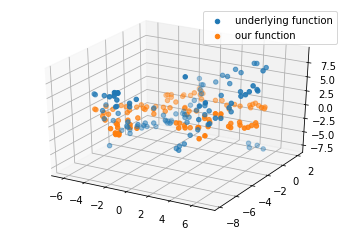

In [19]:
num_epochs=70
lr=0.02

for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print("************************")
    print(f'Epoch {epoch}, loss {loss_value}')
    print("************************")

    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)
    
y_pred= model(x).detach()
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)
X_embedded = TSNE(n_components=2).fit_transform(x.detach())
y_embedded = TSNE(n_components=1).fit_transform(y_true)
plot_3d(X_embedded, y_embedded,y_pred_embedded)

**PYTORCH WITH AUTODIFF**

In [20]:
class MSE:
  def __call__(self, pred_y, true_y):
    self.pred_y = pred_y
    self.true_y = true_y
    return torch.mean((pred_y-true_y)**2)
  
  def backward(self):
    n = self.true_y.shape[0]
    self.gradient = 2.0 * (self.pred_y - self.true_y) / n
    return self.gradient

In [21]:
class Linear(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super(Linear, self).__init__()
    self.init = torch.rand(input_dim, num_hidden).float()
    self.weights = torch.nn.Parameter(self.init, requires_grad=True)
    self.bias = torch.zeros(num_hidden, )
  
  def __call__(self, X):
    self.X = X
    output = torch.mm(X, self.weights) + self.bias
    return output
  
  def backward(self, gradient):
    self.weights_gradient = torch.mm(torch.transpose(X, 0, 1), gradient)
    self.bias_gradient = gradient.sum(0)
    self.X_gradient = torch.mm(gradient, torch.transpose(self.weights, 0, 1))
    return self.X_gradient

  def update(self, learning_rate):
    self.weights = self.weights - learning_rate * self.weights_gradient
    self.bias = self.bias - learning_rate * self.bias_gradient

In [22]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = torch.clamp(self.input_, min=0, out=None)
    return self.output

In [23]:
class Model(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super(Model, self).__init__()
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden,2)

  def forward(self, X):
    l1 = self.linear1(X)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

In [24]:
def fit(X, y, model:Callable, loss:Callable, learning_rate, num_epochs):
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    pred_y = model(X)
    loss_value = loss(pred_y, y)
    if epoch % 5 == 0:
      print(f'Epoch: {epoch}, Loss: {loss_value}')
    loss_value.backward()
    optimizer.step()

In [25]:
no_samples, input_dim, output_dim, learning_rate = 500, 3, 2, 0.01 
X = torch.FloatTensor(no_samples, input_dim).uniform_(-1, 1)

weights_true = torch.tensor([[6, 1, 8],[-3, 1, 3]]).float()
weights_true = torch.transpose(weights_true, 0, 1)
bias_true = torch.tensor([0.5, 1])
true_y = torch.mm(X ** 2, weights_true) + torch.mm(X, weights_true) + bias_true
print(f'X:{X.shape}, y:{true_y.shape}, weights:{weights_true.shape}, bias:{bias_true.shape}')

X:torch.Size([500, 3]), y:torch.Size([500, 2]), weights:torch.Size([3, 2]), bias:torch.Size([2])


In [26]:
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

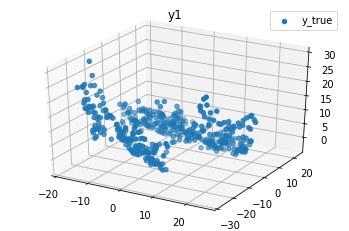

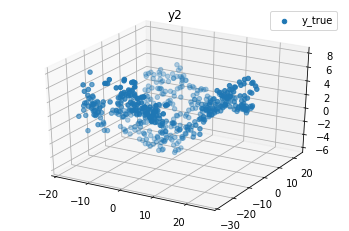

In [27]:
plot_3d('y1', X, true_y[:,0])
plot_3d('y2', X, true_y[:,1])

In [29]:
loss = MSE()
model = Model(input_dim, 10)
pred_y = model(X)
loss_value = loss(pred_y, true_y)

Epoch: 0, Loss: 25.84811782836914
Epoch: 5, Loss: 23.0371150970459
Epoch: 10, Loss: 20.263826370239258
Epoch: 15, Loss: 17.616138458251953
Epoch: 20, Loss: 15.189725875854492
Epoch: 25, Loss: 13.06190013885498
Epoch: 30, Loss: 11.266317367553711
Epoch: 35, Loss: 9.80178451538086
Epoch: 40, Loss: 8.631477355957031
Epoch: 45, Loss: 7.71339225769043
Epoch: 50, Loss: 6.994664192199707
Epoch: 55, Loss: 6.420816898345947
Epoch: 60, Loss: 5.949254035949707
Epoch: 65, Loss: 5.55269718170166
Epoch: 70, Loss: 5.207680702209473
Epoch: 75, Loss: 4.8994317054748535
Epoch: 80, Loss: 4.617403984069824
Epoch: 85, Loss: 4.3554182052612305
Epoch: 90, Loss: 4.1101789474487305
Epoch: 95, Loss: 3.8779397010803223


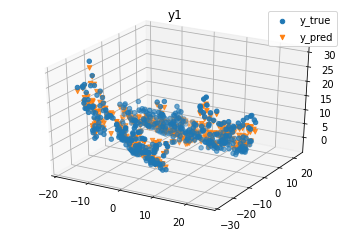

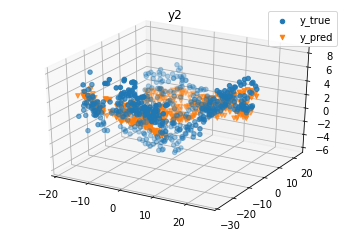

In [30]:
#running for 100 epochs
fit(X, true_y, model=model, loss=loss, learning_rate=learning_rate, num_epochs=100)
pred_y = model(X)
pred_y = pred_y.detach().numpy()
plot_3d('y1', X, true_y[:, 0], pred_y[:, 0])
plot_3d('y2', X, true_y[:, 1], pred_y[:, 1])

**PYTORCH HIGH LEVEL**

In [31]:
import torch
import torch.nn as nn

d=3
class TorchModel(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, 6)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(6, 4)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(4, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    
    return l3
    
loss = nn.MSELoss()
model = TorchModel(d)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(2.7577, grad_fn=<MseLossBackward0>)


tensor(2.7577, grad_fn=<MseLossBackward0>)
tensor(2.5636, grad_fn=<MseLossBackward0>)
tensor(2.3733, grad_fn=<MseLossBackward0>)
tensor(2.1865, grad_fn=<MseLossBackward0>)
tensor(2.0024, grad_fn=<MseLossBackward0>)
tensor(1.8235, grad_fn=<MseLossBackward0>)
tensor(1.6507, grad_fn=<MseLossBackward0>)
tensor(1.4851, grad_fn=<MseLossBackward0>)
tensor(1.3275, grad_fn=<MseLossBackward0>)
tensor(1.1790, grad_fn=<MseLossBackward0>)
tensor(1.0409, grad_fn=<MseLossBackward0>)
tensor(0.9140, grad_fn=<MseLossBackward0>)
tensor(0.7991, grad_fn=<MseLossBackward0>)
tensor(0.6966, grad_fn=<MseLossBackward0>)
tensor(0.6066, grad_fn=<MseLossBackward0>)
tensor(0.5291, grad_fn=<MseLossBackward0>)
tensor(0.4633, grad_fn=<MseLossBackward0>)
tensor(0.4084, grad_fn=<MseLossBackward0>)
tensor(0.3634, grad_fn=<MseLossBackward0>)
tensor(0.3270, grad_fn=<MseLossBackward0>)
tensor(0.2980, grad_fn=<MseLossBackward0>)
tensor(0.2752, grad_fn=<MseLossBackward0>)
tensor(0.2575, grad_fn=<MseLossBackward0>)
tensor(0.24

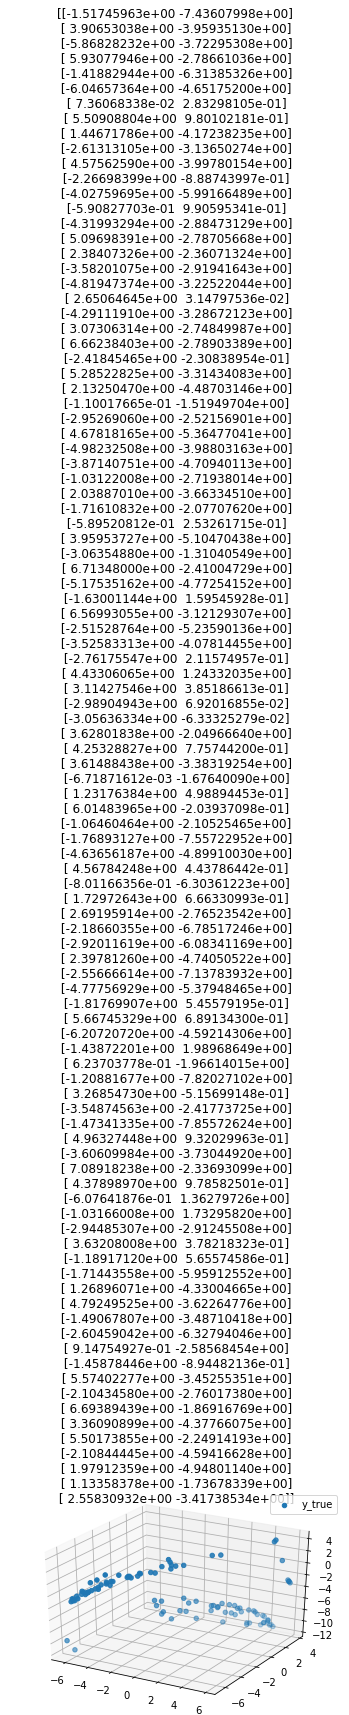

In [32]:
lr=0.02
num_epochs=70
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
for epoch in range(num_epochs):
  optimizer.zero_grad()
  y_pred = model(x)
  loss_value = loss(y_pred, y_true)
  print(loss_value)
  loss_value.backward()
  optimizer.step()

y_pred= model(x).detach()
y_pred_embedded = TSNE(n_components=1).fit_transform(y_pred)
plot_3d(X_embedded, y_embedded,y_pred_embedded)